## Cadenas de Markov

Simulación de Montecarlo

Se puede usar la Simulación de Montecarlo para estimar los estados en un determinado día, volvamos al ejemplo 2 de la clase anterior.
Estados y Matriz de Transición

En nuestro modelo de pronóstico del clima, consideramos tres estados posibles: Soleado (S), Nublado (N) y Lluvioso (L).
Estados

    S: Soleado
    N: Nublado
    L: Lluvioso

teniamos,

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def clima(state,days):
    # Definimos la matriz de transición
    P = np.array([
                 [0.8, 0.15, 0.05],  # De Soleado
                 [0.2, 0.6, 0.2],    # De Nublado
                 [0.1, 0.3, 0.6]     # De Lluvioso
                 ])

    # Evolución durante days
    states = [state]
    for _ in range(days):
        state = np.dot(state, P)
        states.append(state)

    return np.array(states)

estados=clima(np.array([0,0,1]),10)
weather_states = ['Soleado', 'Nublado', 'Lluvioso']
for estado in estados:
    print(weather_states[estado.argmax()])

Lluvioso
Lluvioso
Lluvioso
Nublado
Nublado
Soleado
Soleado
Soleado
Soleado
Soleado
Soleado


In [4]:
import numpy as np

# Markov entrega la probabilidad de cada estado.
# En el caso de Montecarlo se selecciona aleatoriamente el clima segun
# la matriz de transición.

def clima_days(current_state, day):
    # Definimos la matriz de transición
    transition_matrix = np.array([
                        [0.8, 0.15, 0.05],  # De Soleado
                        [0.2, 0.6, 0.2],    # De Nublado
                        [0.1, 0.3, 0.6]     # De Lluvioso
                        ])
    weather_states = ['Soleado', 'Nublado', 'Lluvioso']
    forecast = [weather_states[current_state]]
    for i in range(day):
        # seleccion aleatoria con probabilidad de acuerdo a la matríz de transición
        current_state = np.random.choice([0, 1, 2], p=transition_matrix[current_state])
        forecast.append(weather_states[current_state])
    return forecast

def Montecarlo(current_state, day, runs=1 ):
    # solo guardare la prediccion del último día
    last_day=[]
    for k in range(runs):
        forecast = clima_days(current_state, day)
        last_day.append(forecast[-1])
    return last_day

In [5]:
# con cadenas de markov
states_Markov=clima(np.array([0,0,1]),10)
Forecast=clima_days(2,10)

weather_states = ['Soleado', 'Nublado', 'Lluvioso']
for i in range(10):
    print(weather_states[states_Markov[i].argmax()],  Forecast[i])

# observe que el caso de Markov la predición se mantiene mientras que en
# Montecarlo la predicción cambia.

Lluvioso Lluvioso
Lluvioso Lluvioso
Lluvioso Lluvioso
Nublado Lluvioso
Nublado Lluvioso
Soleado Lluvioso
Soleado Lluvioso
Soleado Lluvioso
Soleado Nublado
Soleado Nublado


Ejemplo **Disponibilidad de un servidor**

Estados:
- O: operativo
- S: sobrecargado
- C: caido

### Objetivos

1. Calcular estado del sistema tras $3$ días $\pi_3$.
2. Encontrar la distribución estacionaria $\pi^*_O$.
3. Estimar por simulación Monte Carlo la distribución tras \(T=1000\) días y comparar con la solución analítica.
4. Visualizar la convergencia temporal de la distribución.
5. Extensión: analizar el efecto de mantenimiento preventivo cada \(m\) días que reinicia a "Operativo" con probabilidad 0.9.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig, matrix_power

# Matriz de transición (orden: [O, S, C])
P = np.array([
    [0.8, 0.15, 0.05],
    [0.3, 0.6 , 0.1 ],
    [0.2, 0.3 , 0.5 ]
])

np.set_printoptions(precision=2, suppress=True)
print('Matriz de transición P:\n', P)


Matriz de transición P:
 [[0.8  0.15 0.05]
 [0.3  0.6  0.1 ]
 [0.2  0.3  0.5 ]]


In [10]:
# 1) Distribución después de 3 días
P3 = matrix_power(P, 3)
pi0 = np.array([1.0, 0.0, 0.0])
pi3 = pi0.dot(P3)
print('P^3 =\n', P3)
print('\nDistribución después de 3 días (pi_3):', pi3)

P^3 =
 [[0.64 0.26 0.1 ]
 [0.51 0.36 0.13]
 [0.45 0.36 0.2 ]]

Distribución después de 3 días (pi_3): [0.64 0.26 0.1 ]


La clase pasada vimos que al calcular 100 veces, la distribución de estados del clima, esta converge y la suma de las probabilidades es 1. Entonces, hay que resolver el sistema de ecuaciones

$$ \pi = \pi P$$

$$ \sum \pi_i = 1 $$

In [11]:
# 2) Distribución estacionaria pi* (resolviendo pi = pi P)
n = P.shape[0] # dimension, cantidad de estados
A = P.T - np.eye(n) # transpuesta de P menos la identidad
# agregamos la restriccion que la suma de probabilidades es 1
A2 = np.vstack([A, np.ones(n)])
b2 = np.zeros(n+1)
b2[-1] = 1.0
pi_star, residuals, rank, s = np.linalg.lstsq(A2, b2, rcond=None)
print('Distribución estacionaria (lstsq):', pi_star)
print('Suma de Distribución estacionaria (lstsq):', np.sum(pi_star))

Distribución estacionaria (lstsq): [0.58 0.31 0.12]
Suma de Distribución estacionaria (lstsq): 1.0000000000000004


In [14]:
# Alternativa con eigenvector izquierdo
w, v = eig(P.T)
idx = np.argmin(np.abs(w - 1.0))
pi_eig = np.real(v[:, idx])
pi_eig = pi_eig / pi_eig.sum()

print('Distribución estacionaria (eigen):  ', pi_eig)
print('\nInterpretación: disponibilidad a largo plazo (pi*_O) =', pi_star[0])

Distribución estacionaria (eigen):   [0.58 0.31 0.12]

Interpretación: disponibilidad a largo plazo (pi*_O) = 0.5762711864406785


In [ ]:
# 3) Simulación Monte Carlo vectorizada

def montecarlo_vectorizado(P, N=int(1e5), T=1000, seed=2025):
    rng = np.random.default_rng(seed)
    n_states = P.shape[0]
    cdfs = np.cumsum(P, axis=1)
    states = np.zeros(N, dtype=np.int64)  # todos empiezan en operativo (0)

    for t in range(T):
        u = rng.random(N)
        for s in range(n_states):
            idx = np.nonzero(states == s)[0]
            if idx.size == 0:
                continue
            new = np.searchsorted(cdfs[s], u[idx], side='right')
            states[idx] = new

    counts = np.bincount(states, minlength=n_states)
    return counts / N, states

pi_emp, final_states = montecarlo_vectorizado(P, N=100000, T=1000, seed=2025)
print('Distribución empírica (MonteCarlo, T=1000, N=1e5):', pi_emp)
print('Comparación analítica vs empírica:')
print('pi* (analítica) =', pi_star)
print('pi_emp          =', pi_emp)
print('\nDiferencia (emp - analítica) =', pi_emp - pi_star)

Distribución empírica (MonteCarlo, T=1000, N=1e5): [0.57 0.27 0.17]
Comparación analítica vs empírica:
pi* (analítica) = [0.58 0.31 0.12]
pi_emp          = [0.57 0.27 0.17]

Diferencia (emp - analítica) = [-0.01 -0.04  0.05]


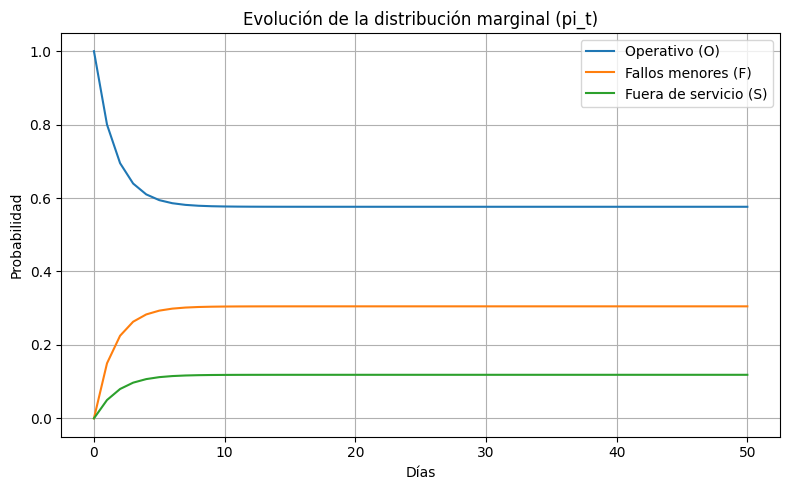

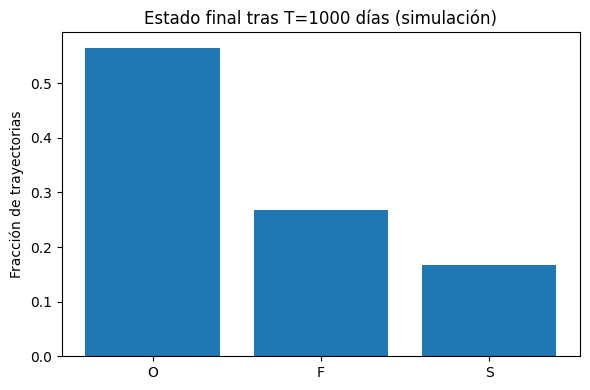

In [16]:
# 4) Gráficos: evolución temporal e histograma final
Tplot = 50
pis = np.zeros((Tplot+1, n))
pis[0] = pi0
for t in range(1, Tplot+1):
    pis[t] = pis[t-1].dot(P)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(range(Tplot+1), pis[:,0], label='Operativo (O)')
ax.plot(range(Tplot+1), pis[:,1], label='Fallos menores (F)')
ax.plot(range(Tplot+1), pis[:,2], label='Fuera de servicio (S)')
ax.set_xlabel('Días')
ax.set_ylabel('Probabilidad')
ax.set_title('Evolución de la distribución marginal (pi_t)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(['O','F','S'], np.bincount(final_states, minlength=n)/final_states.size)
ax.set_ylabel('Fracción de trayectorias')
ax.set_title('Estado final tras T=1000 días (simulación)')
plt.tight_layout()
plt.show()


### Extensión: mantenimiento preventivo

Cada \(m\) días se realiza un mantenimiento que, **independientemente del estado actual**, tiene probabilidad de 0.9 de reiniciar el servidor a **Operativo (O)**. Vamos a simular y comparar la disponibilidad promedio con y sin mantenimiento.


In [17]:
# Simulación con mantenimiento periódico

def simulate_with_maintenance(P, period=5, reset_prob=0.9, N=int(1e5), T=1000, seed=2025):
    rng = np.random.default_rng(seed)
    n_states = P.shape[0]
    cdfs = np.cumsum(P, axis=1)
    states = np.zeros(N, dtype=np.int64)
    frac_oper = np.zeros(T)

    for t in range(T):
        u = rng.random(N)
        for s in range(n_states):
            idx = np.nonzero(states == s)[0]
            if idx.size == 0:
                continue
            new = np.searchsorted(cdfs[s], u[idx], side='right')
            states[idx] = new

        if (t+1) % period == 0:
            r = rng.random(N)
            to_reset = r < reset_prob
            states[to_reset] = 0

        frac_oper[t] = np.mean(states == 0)

    return frac_oper, states

# Simular sin mantenimiento (equivalente: period grande o reset_prob=0)
frac_nom, _ = simulate_with_maintenance(P, period=10000, reset_prob=0.0, N=50000, T=1000, seed=2025)
frac_maint5, _ = simulate_with_maintenance(P, period=5, reset_prob=0.9, N=50000, T=1000, seed=2025)

print('Disponibilidad media sin mantenimiento (promedio días 200-1000):', frac_nom[200:].mean())
print('Disponibilidad media con mantenimiento cada 5 días (reset p=0.9):', frac_maint5[200:].mean())


Disponibilidad media sin mantenimiento (promedio días 200-1000): 0.5669145250000001
Disponibilidad media con mantenimiento cada 5 días (reset p=0.9): 0.727288725


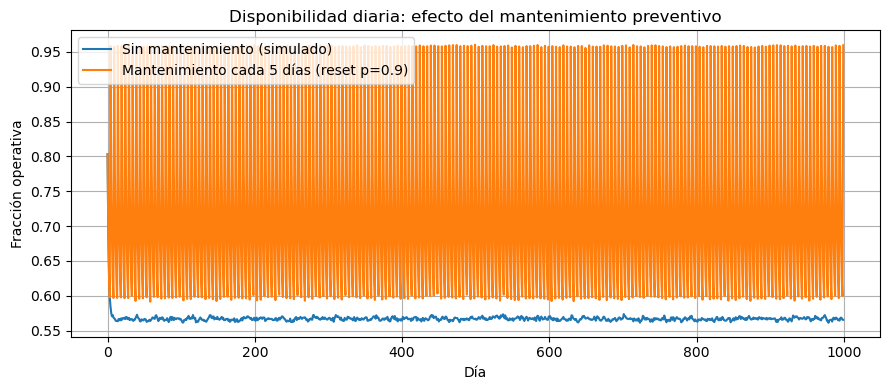

In [39]:
# Gráfico comparativo de disponibilidad diaria (sin mantenimiento vs cada 5 días)
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(range(1000), frac_nom, label='Sin mantenimiento (simulado)')
ax.plot(range(1000), frac_maint5, label='Mantenimiento cada 5 días (reset p=0.9)')
ax.set_xlabel('Día')
ax.set_ylabel('Fracción operativa')
ax.set_title('Disponibilidad diaria: efecto del mantenimiento preventivo')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


Observaciones:

- El mantenimiento preventivo cada 5 días con probabilidad de reinicio 0.9 aumenta la disponibilidad media.
- Introducir mantenimiento periódico rompe la homogeneidad temporal del proceso.